In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

In [51]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [46]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [52]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [53]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [54]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [56]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [60]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b84fd37ffa0386b6a91e99fcb35ca4af


In [61]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [62]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belmonte
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | gorontalo
Processing Record 4 of Set 1 | houma
Processing Record 5 of Set 1 | nguiu
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | champagnole
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | mendahara
City not found. Skipping...
Processing Record 19 of Set 1 | hobart
Processing Recor

Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | tevriz
Processing Record 42 of Set 4 | salinopolis
Processing Record 43 of Set 4 | ixtapa
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | kirakira
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | blind river
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | pochutla
Processing Record 1 of Set 5 | hamilton
Processing Record 2 of Set 5 | makakilo city
Processing Record 3 of Set 5 | antonovo
Processing Record 4 of Set 5 | sonepur
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record 6 of Set 5 | kargil
Processing Record 7 of Set 5 | nemuro
Processing Record 8 of Set 5 | erzin
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | spitsevka
Processing Record 11 of Set 5 | asyut
Processing Record 12 of Set 5 | santa marta
Processing Reco

Processing Record 30 of Set 8 | kandrian
Processing Record 31 of Set 8 | berlevag
Processing Record 32 of Set 8 | maningrida
Processing Record 33 of Set 8 | beringovskiy
Processing Record 34 of Set 8 | portland
Processing Record 35 of Set 8 | tiarei
Processing Record 36 of Set 8 | chiredzi
Processing Record 37 of Set 8 | quelimane
Processing Record 38 of Set 8 | gigmoto
Processing Record 39 of Set 8 | rafaela
Processing Record 40 of Set 8 | westport
Processing Record 41 of Set 8 | aksarka
Processing Record 42 of Set 8 | tomohon
Processing Record 43 of Set 8 | sudbury
Processing Record 44 of Set 8 | gamboula
Processing Record 45 of Set 8 | the valley
Processing Record 46 of Set 8 | korla
Processing Record 47 of Set 8 | derzhavinsk
Processing Record 48 of Set 8 | mamlyutka
Processing Record 49 of Set 8 | grand island
Processing Record 50 of Set 8 | rafai
Processing Record 1 of Set 9 | brae
Processing Record 2 of Set 9 | tigil
Processing Record 3 of Set 9 | lahaina
Processing Record 4 of 

Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | sosnovo-ozerskoye
Processing Record 21 of Set 12 | bama
Processing Record 22 of Set 12 | honningsvag
Processing Record 23 of Set 12 | sexsmith
Processing Record 24 of Set 12 | hami
Processing Record 25 of Set 12 | guanica
Processing Record 26 of Set 12 | lakes entrance
Processing Record 27 of Set 12 | el alto
Processing Record 28 of Set 12 | saint-paul
Processing Record 29 of Set 12 | birao
Processing Record 30 of Set 12 | cozumel
Processing Record 31 of Set 12 | luba
Processing Record 32 of Set 12 | murgab
Processing Record 33 of Set 12 | nuoro
Processing Record 34 of Set 12 | kurilsk
Processing Record 35 of Set 12 | newport
Processing Record 36 of Set 12 | sao filipe
Processing Record 37 of Set 12 | nouakchott
Processing Record 38 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 39 of Set 12 | north olmsted
Processing Record 40 of Set 12 | asbe teferi
Processing Record 41 of Set 12 | 

In [75]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Belmonte,-15.8631,-38.8828,72.10,90,49,4.45,BR,2022-02-24 07:01:34
1,Gorontalo,0.5412,123.0595,87.15,58,100,8.95,ID,2022-02-24 07:01:35
2,Houma,29.5958,-90.7195,72.00,93,5,5.01,US,2022-02-24 07:01:35
3,Rikitea,-23.1203,-134.9692,79.50,72,99,8.23,PF,2022-02-24 07:01:35
4,Bluff,-46.6000,168.3333,63.81,71,0,4.41,NZ,2022-02-24 07:01:36
5,Busselton,-33.6500,115.3333,88.09,39,100,8.52,AU,2022-02-24 07:01:36
6,Sitka,57.0531,-135.3300,29.16,88,48,4.65,US,2022-02-24 07:01:37
7,Katsuura,35.1333,140.3000,51.12,31,75,8.46,JP,2022-02-24 07:01:37
8,Champagnole,46.7445,5.9135,44.49,74,100,11.45,FR,2022-02-24 07:01:38
9,Saint-Philippe,-21.3585,55.7679,85.55,85,54,12.73,RE,2022-02-24 07:01:38


In [76]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

In [77]:
city_data_df = city_data_df[new_column_order]

In [78]:
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Belmonte,49,BR,2022-02-24 07:01:34,90,-15.8631,-38.8828,72.10,4.45
1,Gorontalo,100,ID,2022-02-24 07:01:35,58,0.5412,123.0595,87.15,8.95
2,Houma,5,US,2022-02-24 07:01:35,93,29.5958,-90.7195,72.00,5.01
3,Rikitea,99,PF,2022-02-24 07:01:35,72,-23.1203,-134.9692,79.50,8.23
4,Bluff,0,NZ,2022-02-24 07:01:36,71,-46.6000,168.3333,63.81,4.41
...,...,...,...,...,...,...,...,...,...
589,Stornoway,40,GB,2022-02-24 07:18:28,73,58.2093,-6.3865,37.92,16.11
590,Salekhard,100,RU,2022-02-24 07:18:29,93,66.5300,66.6019,14.76,3.47
591,Mount Isa,5,AU,2022-02-24 07:18:29,14,-20.7333,139.5000,96.57,13.80
592,Khor,100,RU,2022-02-24 07:18:29,92,47.8861,134.9464,18.55,12.26


In [83]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [84]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [85]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1645689618.6349585

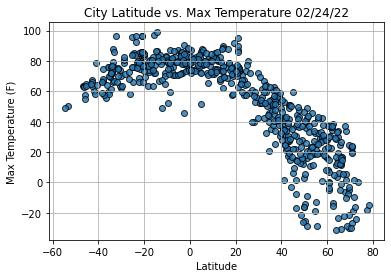

In [86]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

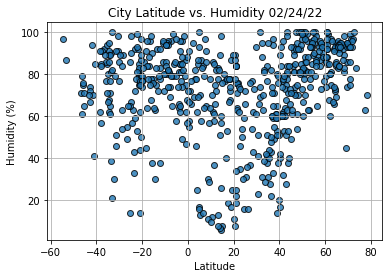

In [87]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

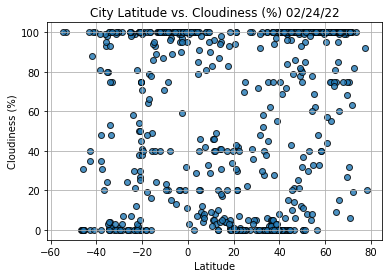

In [88]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

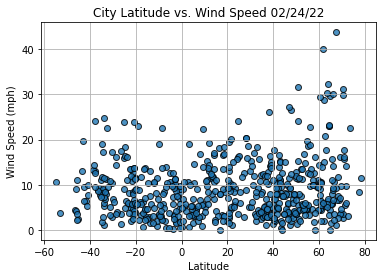

In [89]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [92]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [93]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Gorontalo,100,ID,2022-02-24 07:01:35,58,0.5412,123.0595,87.15,8.95
2,Houma,5,US,2022-02-24 07:01:35,93,29.5958,-90.7195,72.00,5.01
6,Sitka,48,US,2022-02-24 07:01:37,88,57.0531,-135.3300,29.16,4.65
7,Katsuura,75,JP,2022-02-24 07:01:37,31,35.1333,140.3000,51.12,8.46
8,Champagnole,100,FR,2022-02-24 07:01:38,74,46.7445,5.9135,44.49,11.45
...,...,...,...,...,...,...,...,...,...
587,Ishinomaki,3,JP,2022-02-24 07:18:27,59,38.4167,141.3000,41.00,26.02
588,Carberry,32,CA,2022-02-24 07:18:28,99,49.8689,-99.3602,-16.35,6.53
589,Stornoway,40,GB,2022-02-24 07:18:28,73,58.2093,-6.3865,37.92,16.11
590,Salekhard,100,RU,2022-02-24 07:18:29,93,66.5300,66.6019,14.76,3.47


In [94]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Gorontalo,100,ID,2022-02-24 07:01:35,58,0.5412,123.0595,87.15,8.95
2,Houma,5,US,2022-02-24 07:01:35,93,29.5958,-90.7195,72.00,5.01
6,Sitka,48,US,2022-02-24 07:01:37,88,57.0531,-135.3300,29.16,4.65
7,Katsuura,75,JP,2022-02-24 07:01:37,31,35.1333,140.3000,51.12,8.46
8,Champagnole,100,FR,2022-02-24 07:01:38,74,46.7445,5.9135,44.49,11.45


In [95]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

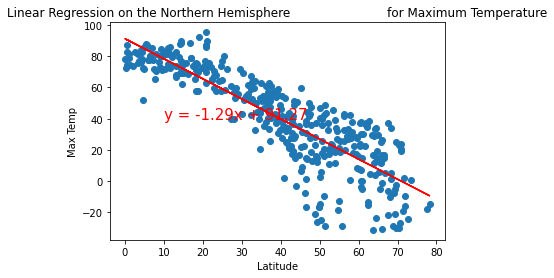

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

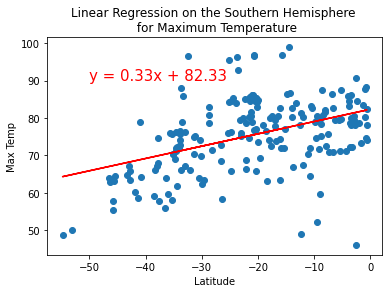

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

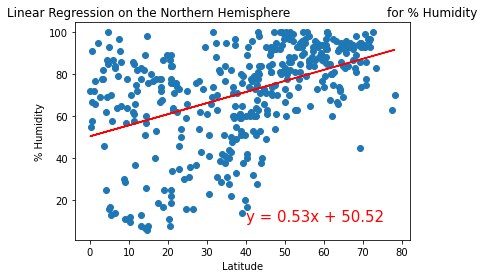

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

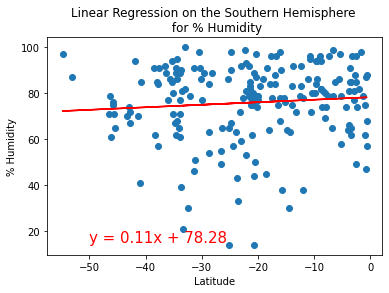

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

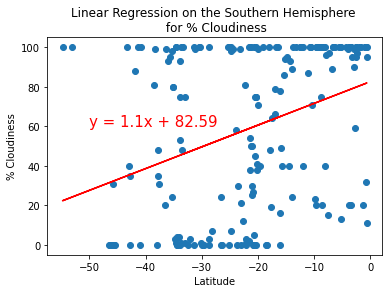

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

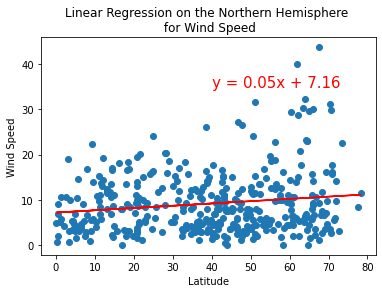

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

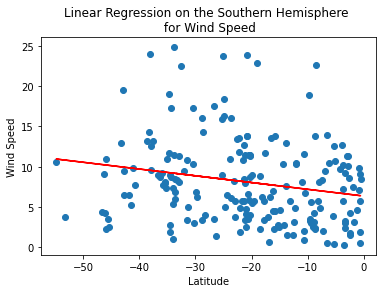

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [105]:
# Google API Key
g_key = "your Google API key goes here"